# Image Processing

In [1]:
!wget https://raw.githubusercontent.com/keivalya/Robo-AI-recorded/refs/heads/main/9%20Image%20Processing/Lenna.png

--2024-11-27 22:05:21--  https://raw.githubusercontent.com/keivalya/Robo-AI-recorded/refs/heads/main/9%20Image%20Processing/Lenna.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna.png’

Lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.03s   

2024-11-27 22:05:21 (14.9 MB/s) - ‘Lenna.png’ saved [473831/473831]



## Introduction to Image Processing

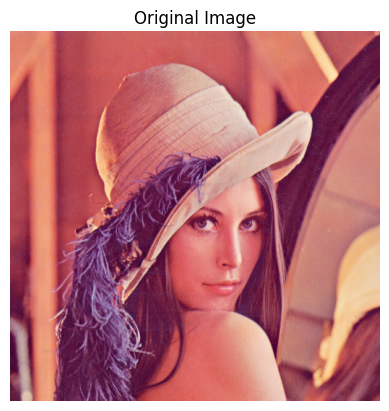

In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and display an example image
image = cv2.imread("/content/Lenna.png", cv2.IMREAD_COLOR)  # Replace 'input.jpg' with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

## Section 1: What is an Image?

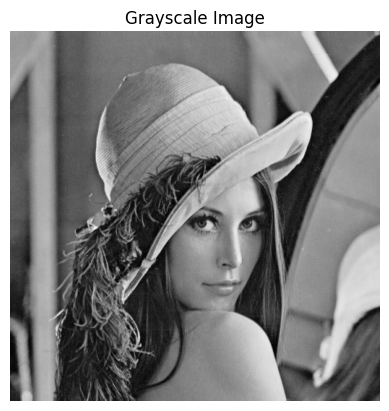

Pixel Matrix (Snippet):
[[162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [162 162 162 161 162 157 163 161 165 161]
 [164 164 158 155 161 159 159 160 160 160]
 [160 160 163 158 160 162 159 156 159 162]
 [159 159 155 157 158 159 156 157 159 161]
 [155 155 158 158 159 160 157 157 163 157]
 [155 155 157 158 155 154 155 157 161 154]]


In [3]:
# For computers, an image is a matrix of pixel values.

# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image and its pixel matrix
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Show a snippet of the pixel matrix
print("Pixel Matrix (Snippet):")
print(image_gray[:10, :10])

## Section 2: Color Correction (Histogram Equalization)

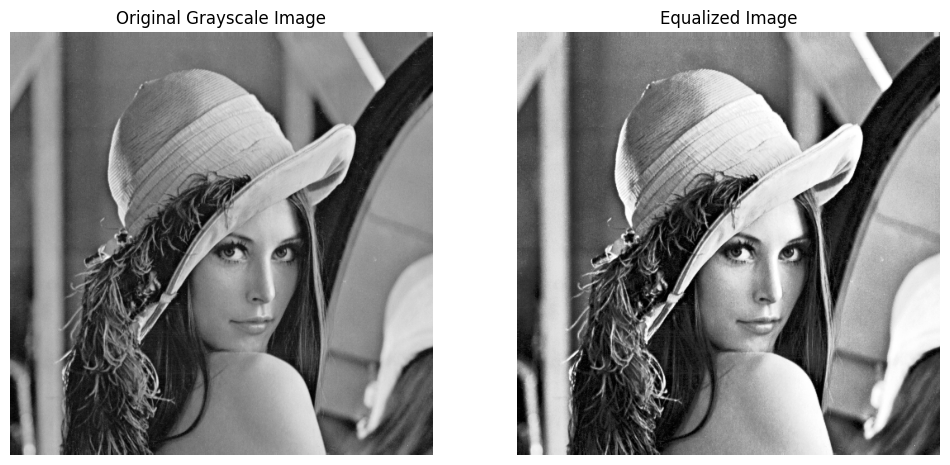

In [4]:
# Histogram Equalization improves the contrast of an image.

# Perform histogram equalization on the grayscale image
equalized_image = cv2.equalizeHist(image_gray)

# Display the original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')
plt.show()

## Section 3: Image Sharpening

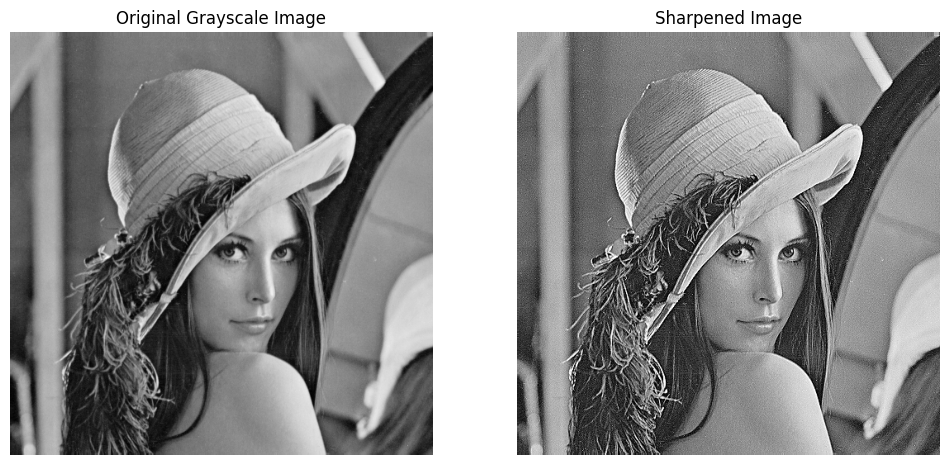

In [5]:
# Sharpening emphasizes edges and details in an image.

# Define a sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply the kernel to the grayscale image
sharpened_image = cv2.filter2D(image_gray, -1, kernel)

# Display the original and sharpened images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')
plt.show()

## Section 4: Edge Detection (Sobel and Canny)

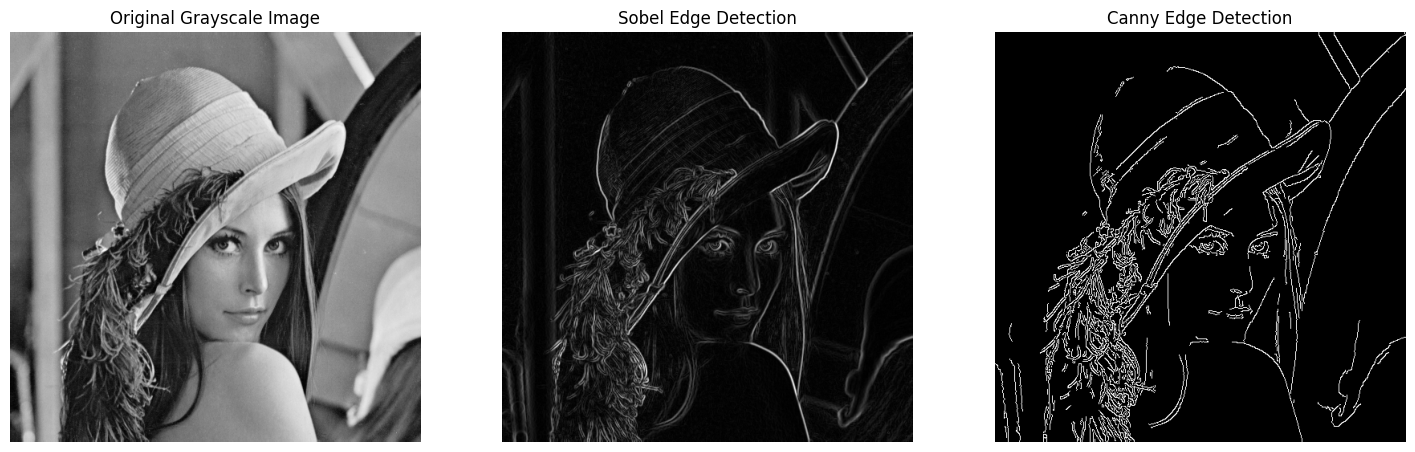

In [6]:
# Detect edges using Sobel and Canny methods.

# Sobel Edge Detection
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_edges = cv2.magnitude(sobelx, sobely)

# Canny Edge Detection
canny_edges = cv2.Canny(image_gray, 100, 200)

# Display the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

## Section 5: Noise Reduction (Filtering Techniques)

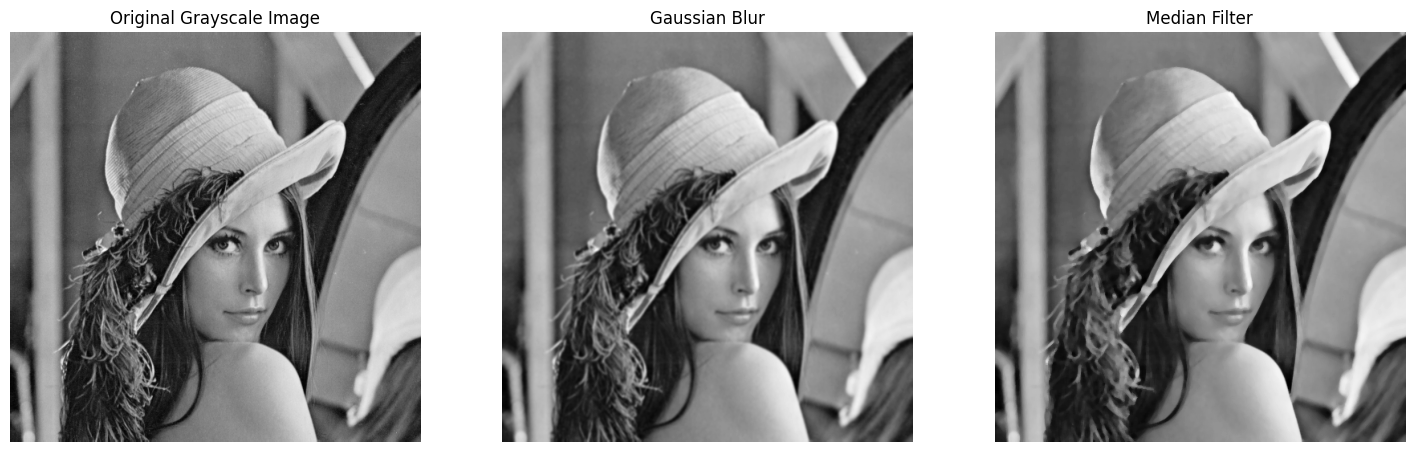

In [7]:
# Noise reduction using Gaussian Blur and Median Filtering.

# Apply Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)

# Apply Median Filter
median_blur = cv2.medianBlur(image_gray, 5)

# Display the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_blur, cmap='gray')
plt.title("Median Filter")
plt.axis('off')
plt.show()

## Section 6: Feature Extraction (Harris Corners and SIFT)

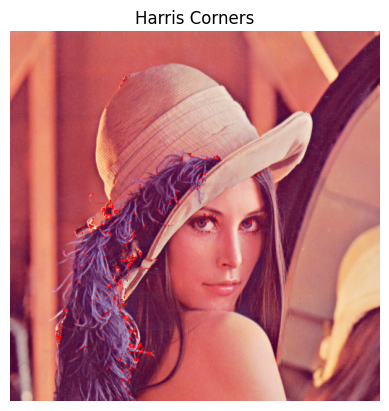

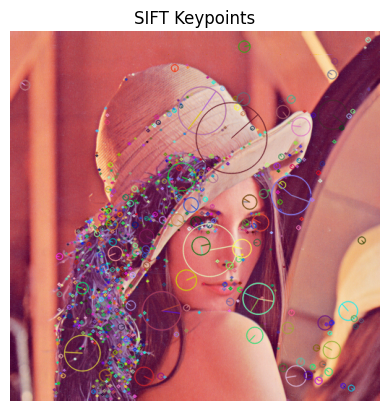

In [8]:
# Harris Corner Detection
gray_float = np.float32(image_gray)
harris_corners = cv2.cornerHarris(gray_float, 2, 3, 0.04)
image_with_corners = image_rgb.copy()
image_with_corners[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]

plt.imshow(image_with_corners)
plt.title("Harris Corners")
plt.axis('off')
plt.show()

# SIFT Keypoint Detection
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image_gray, None)
image_sift = cv2.drawKeypoints(image_rgb, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(image_sift)
plt.title("SIFT Keypoints")
plt.axis('off')
plt.show()

## Practical Project: Real-World Application

In [ ]:
# Combine all techniques to process a real-world image for better analysis.
# Example: Enhance a noisy low-contrast image, detect edges, and extract features.

# Load a noisy, low-contrast image
noisy_image = cv2.imread('noisy_image.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Enhance contrast
equalized_noisy_image = cv2.equalizeHist(noisy_image)

# Reduce noise
denoised_image = cv2.medianBlur(equalized_noisy_image, 5)

# Detect edges
edges = cv2.Canny(denoised_image, 100, 200)

# Extract features using Harris
harris_corners_noisy = cv2.cornerHarris(np.float32(denoised_image), 2, 3, 0.04)
processed_image = cv2.cvtColor(denoised_image, cv2.COLOR_GRAY2BGR)
processed_image[harris_corners_noisy > 0.01 * harris_corners_noisy.max()] = [0, 255, 0]

# Display the pipeline results
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1), plt.imshow(noisy_image, cmap='gray'), plt.title("Noisy Image"), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(equalized_noisy_image, cmap='gray'), plt.title("Enhanced Contrast"), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(edges, cmap='gray'), plt.title("Edges"), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(processed_image), plt.title("Corners Extracted"), plt.axis('off')
plt.show()